**Introduction**

Welcome to the AutoAnalytics: Fuel and Emission Insights project! This Python-based analysis leverages data science and machine learning to explore and predict critical metrics such as fuel consumption, emissions, and vehicle efficiency. By examining key attributes of vehicles, this project provides actionable insights for improving automotive performance and sustainability.
What to Expect in This Code:
- Data Exploration & Preprocessing:

    The project begins by inspecting the dataset, addressing missing values, handling outliers, and transforming data for robust analysis.
    Feature engineering includes encoding categorical variables (e.g., fuel type, transmission type) and mapping data for better interpretability.

- Exploratory Data Analysis (EDA):

    Visualizations and statistical analysis uncover trends, such as the influence of engine size and vehicle class on fuel efficiency and emissions.

- Model Building:

    Three machine learning models—Random Forest Regressor, Gradient Boosting Regressor, and Support Vector Regressor—are developed and evaluated.
    The models are fine-tuned and validated using cross-validation to ensure accuracy and consistency in predictions.

- Insights:

Key findings include:

    Smaller engines and fewer cylinders are associated with higher fuel efficiency.
    Fuel types like Ethanol and Natural Gas show promise for reduced emissions, though less common in the dataset.
    Transmission types significantly impact vehicle performance, with Continuously Variable Transmissions offering the best fuel efficiency.

- Why This Matters:

This project showcases how data science can drive innovation in the automotive industry. By understanding factors affecting fuel consumption and emissions, manufacturers and policymakers can design more efficient and eco-friendly vehicles. These insights also contribute to broader sustainability goals, paving the way for a greener future.

*Importing the required Libraries & Loading the Dataset*

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
df = pd.read_csv(r'desktop/Datasets/Fuel_Consumption.csv')

In [55]:
df.shape

(22556, 13)

The data contains 22556 rows and 13 columns

In [56]:
#Displaying the datatype of each column
df.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

The DataFrame includes 13 columns with various data types: integers, floats, and objects.

In [57]:
#Checking for missing Values
df.isna().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

**Statistical Summary of the Data**

In [58]:
#Generating statistical summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


The statistical summary provides key metrics for each numeric column, such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.

**Exploratory Data Analysis**

In [59]:
#Top 10 Least Fuel-Efficient Car Brands by Combined MPG
least_fuel_efficient_brands = df.groupby('MAKE')['COMB (mpg)'].mean().sort_values(ascending = True)

least_fuel_efficient_brands.head(10)

MAKE
Bugatti        12.222222
BUGATTI        13.000000
FERRARI        15.931507
Lamborghini    16.000000
LAMBORGHINI    16.892308
Rolls-Royce    16.952381
BENTLEY        17.244186
ROLLS-ROYCE    18.187500
Bentley        18.937500
SRT            19.000000
Name: COMB (mpg), dtype: float64

Observation
- The output displays the mean combined miles per gallon (mpg) for the top 10 least fuel-efficient car brands, with Bugatti being the least efficient at 12.22 mpg. I guess more power comes with a price. 

In [60]:
#Top 10 Most Fuel-Efficient Car Brands by Combined MPG
top_fuel_efficient_brands = df.groupby('MAKE')['COMB (mpg)'].mean().sort_values(ascending = False)

top_fuel_efficient_brands.head(10)

MAKE
SMART         52.045455
SCION         37.090909
MINI          36.798030
Honda         36.634615
Hyundai       36.366667
FIAT          36.247059
HONDA         36.032099
Kia           35.218750
Mitsubishi    35.071429
Toyota        34.975207
Name: COMB (mpg), dtype: float64

The output displays the top 10 most fuel-efficient car brands based on the average combined miles per gallon (mpg), with SMART at the top with an average of 52.05 mpg.

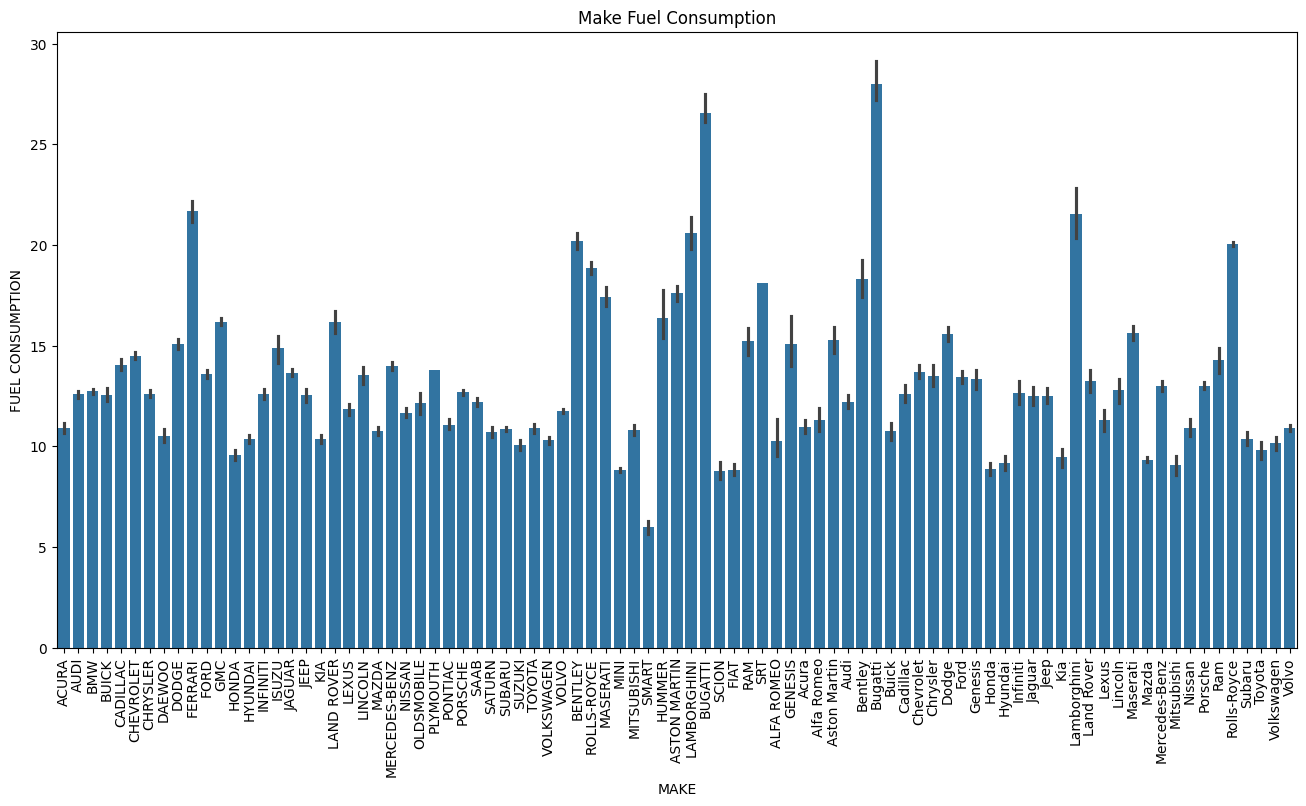

In [61]:
#Fuel Consumption by Car Make
plt.figure(figsize=(16,8))
sns.barplot(data=df,y='FUEL CONSUMPTION',x='MAKE')
plt.xticks(rotation=90)
plt.title("Make Fuel Consumption", loc='center')
plt.show()

Observation
- The bar plot reveals significant variations in fuel consumption across different car makes. Notably, some makes, such as "ASTON MARTIN" and "LAMBORGHINI," have considerably higher fuel consumption, which are considered supercars, whereas others, like "SMART" and "FIAT," are more fuel-efficient. 

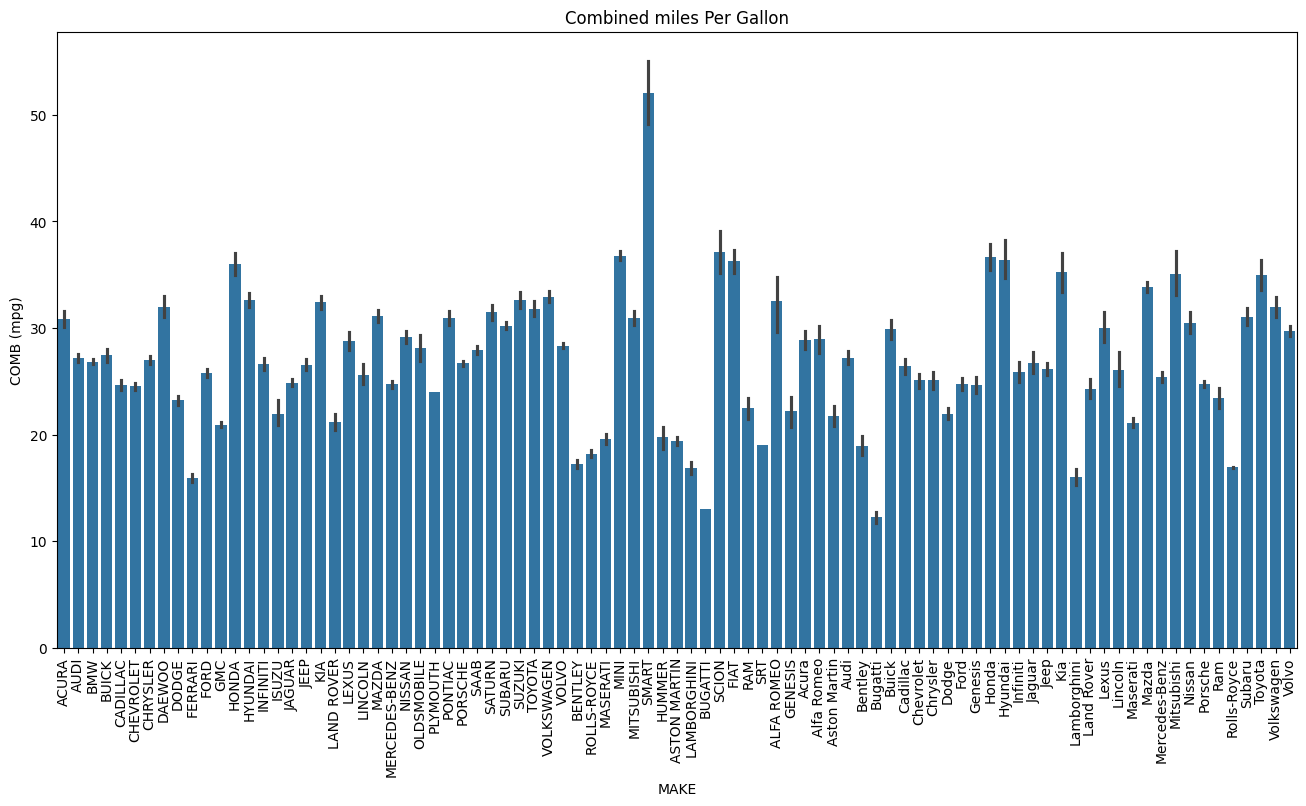

In [62]:
#Combined Miles Per Gallon by Car Make
plt.figure(figsize=(16,8))
sns.barplot(data=df,y='COMB (mpg)',x='MAKE')
plt.xticks(rotation=90)
plt.title("Combined miles Per Gallon", loc='center')
plt.show()

Observation
- The bar chart reveals significant variability in fuel efficiency among different car makes. Notably, "SMART" stands out with the highest combined miles per gallon (MPG), exceeding 50 MPG, indicating a strong focus on fuel efficiency. On the other hand, luxury brands like "LAMBORGHINI" and "ROLLS-ROYCE" have much lower combined MPG, around 10-15 MPG, suggesting a priority on performance and luxury over fuel efficiency. This highlights the trade-offs between fuel economy and other vehicle attributes among different manufacturers, but the population that can afford luxury and supercars shoud not bother about fuel consumption.

In [63]:
#Brand Popularity
df.MAKE.value_counts().head(10)

MAKE
CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
DODGE             789
TOYOTA            759
PORSCHE           658
AUDI              609
NISSAN            608
Name: count, dtype: int64

The most popular brand in our data is CHEVROLET, and the runner up is BMW

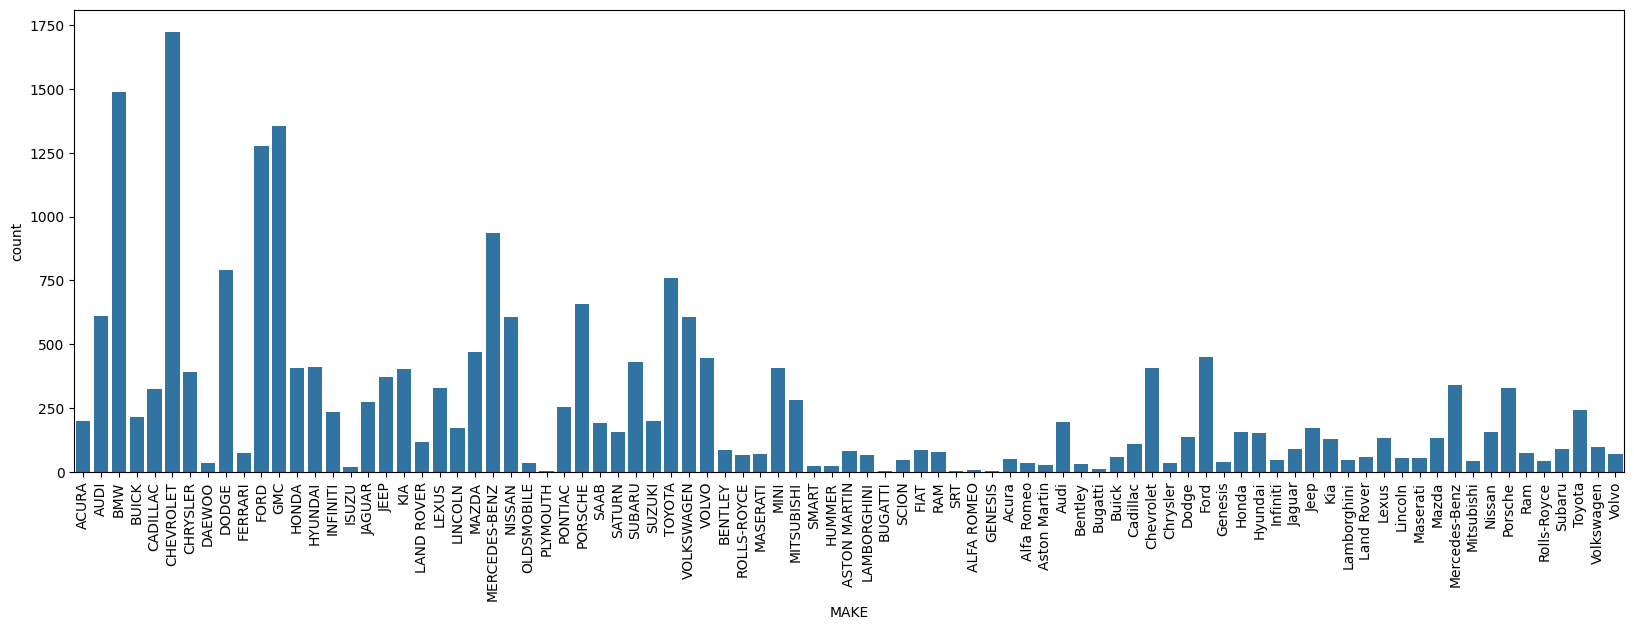

In [64]:
#Distribution of Vehicle Makes in the Dataset
plt.figure(figsize=(20, 6))
sns.countplot(x='MAKE', data=df)
plt.xticks(rotation=90)
plt.show()

Observation:

- Dominant Makes: Ford, Chevrolet, and Toyota have the highest vehicle counts, indicating these brands' popularity in the dataset.

- Moderately Popular Makes: Honda, Nissan, and Jeep also show high counts, suggesting they are fairly popular but not as dominant as the top three.

- Less Common Makes: Brands like Daewoo, Fisker, and Lotus have very low counts, highlighting their rarity in the dataset.

- Diverse Representation: The dataset includes a wide range of vehicle makes, showcasing the diversity and variety present.

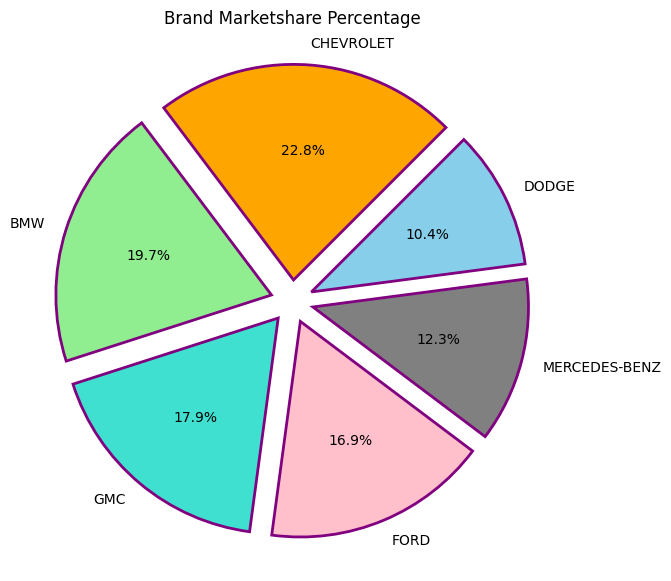

In [65]:
#Brand Marketshare Percentage Distribution
fig = plt.figure(figsize=(7,7))
colors = ("orange", "lightgreen", "turquoise", "pink","gray","skyblue")
wp = {'linewidth':2, 'edgecolor':"purple"}
tags = df.MAKE.value_counts().head(6)
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors, startangle=45,
          wedgeprops = wp, label='', explode = explode)
plt.title("Brand Marketshare Percentage", loc='center')
plt.show()

Observation
- The pie chart titled "Brand Marketshare Percentage" shows the market shares of six car brands: Chevrolet (22.8%), Dodge (10.4%), Mercedes-Benz (12.3%), Ford (16.9%), GMC (17.9%), and BMW (19.7%).

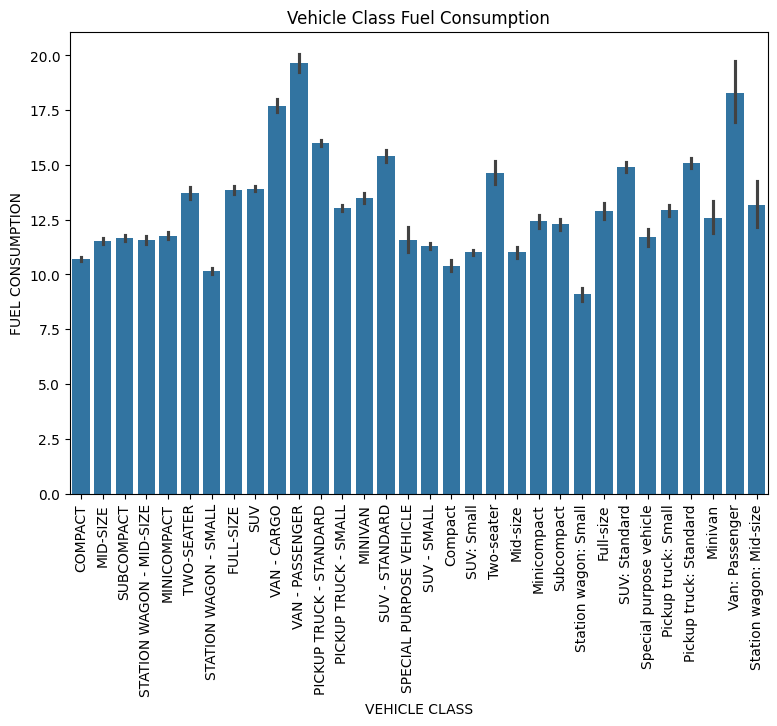

In [66]:
#Fuel Consumption by Vehicle Class
plt.figure(figsize=(9, 6))
plt.xlabel("VEHICLE CLASS")
plt.ylabel("FUEL CONSUMPTION")
plt.title("Vehicle Class Fuel Consumption")

sns.barplot(x='VEHICLE CLASS', y='FUEL CONSUMPTION', data=df)
plt.xticks(rotation=90)
plt.show()

Observation
- The bar plot reveals that fuel consumption varies significantly across different vehicle classes. For instance, larger vehicle classes like "Standard SUV" and "Pickup" tend to have higher fuel consumption compared to smaller classes like "Compact" and "Subcompact." This highlights the importance of considering vehicle class when evaluating fuel efficiency and emissions.

In [67]:
#Least Fuel-Efficient Vehicle Classes Based on Average Fuel Consumption
Least_fuel_efficient_vehicle_class = df.groupby('VEHICLE CLASS')['FUEL CONSUMPTION'].mean().sort_values(ascending = False)
Least_fuel_efficient_vehicle_class.head(6)

VEHICLE CLASS
VAN - PASSENGER            19.666202
Van: Passenger             18.291667
VAN - CARGO                17.704217
PICKUP TRUCK - STANDARD    15.997513
SUV - STANDARD             15.397665
Pickup truck: Standard     15.082136
Name: FUEL CONSUMPTION, dtype: float64

Observation
- The output identifies the least fuel-efficient vehicle classes based on average fuel consumption. "VAN - PASSENGER" is the least fuel-efficient with an average of 19.686 L/100 km, followed by other vans and standard pickup trucks, which also have high fuel consumption rates.

In [68]:
#Least efficent vehicle by MPG
Least_fuel_efficient_vehicle_class = df.groupby('VEHICLE CLASS')['COMB (mpg)'].mean().sort_values(ascending = True)
Least_fuel_efficient_vehicle_class.head(6)

VEHICLE CLASS
VAN - PASSENGER            17.034843
Van: Passenger             17.500000
VAN - CARGO                18.572289
PICKUP TRUCK - STANDARD    20.878034
Pickup truck: Standard     21.603883
SUV - STANDARD             21.961089
Name: COMB (mpg), dtype: float64

In [69]:
#Top Fuel-Efficient Vehicle Classes Based on Average Fuel Consumption
Top_fuel_efficient_vehicle_class = df.groupby('VEHICLE CLASS')['FUEL CONSUMPTION'].mean().sort_values()
Top_fuel_efficient_vehicle_class.head(6)

VEHICLE CLASS
Station wagon: Small      9.113571
STATION WAGON - SMALL    10.152374
Compact                  10.395519
COMPACT                  10.705159
SUV: Small               11.017330
Mid-size                 11.017879
Name: FUEL CONSUMPTION, dtype: float64

In [70]:
#Top Fuel-Efficient Vehicle Classes Based on Average Combined MPG
Top_fuel_efficient_vehicle_class = df.groupby('VEHICLE CLASS')['COMB (mpg)'].mean().sort_values(ascending = False)
Top_fuel_efficient_vehicle_class.head(6)

VEHICLE CLASS
Station wagon: Small     35.607143
STATION WAGON - SMALL    32.792402
Compact                  32.551935
COMPACT                  32.244689
Mid-size                 31.672727
MID-SIZE                 30.517391
Name: COMB (mpg), dtype: float64

Observation
- The output identifies the top six vehicle classes with the highest average combined miles per gallon (MPG). "Station wagon: Small" leads with an average of 35.61 MPG, indicating it is the most fuel-efficient vehicle class.

Text(0.5, 1.0, 'Engine Size Fuel Consumption')

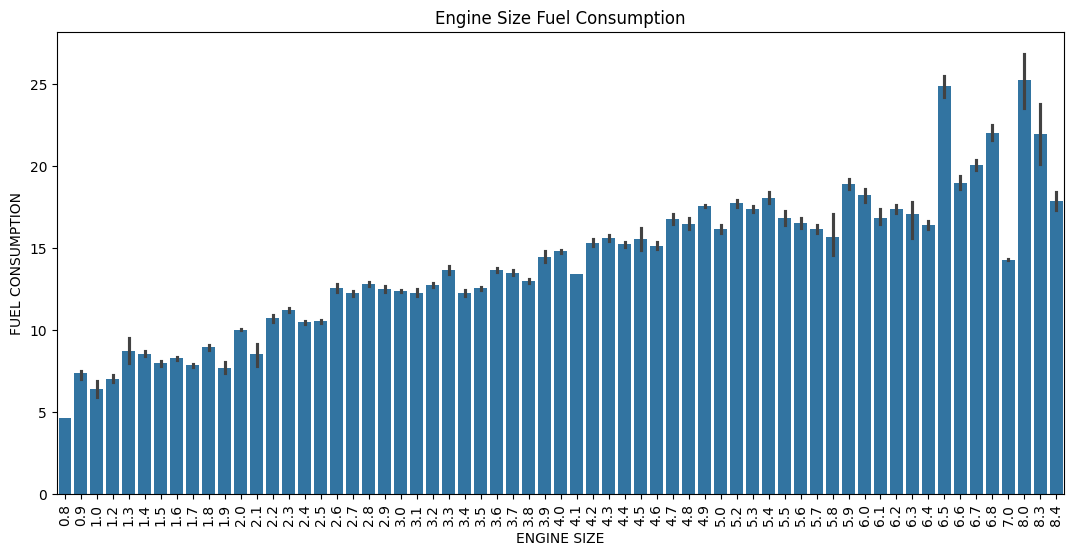

In [71]:
#Impact of Engine Size on Fuel Consumption
plt.figure(figsize=(13,6))
sns.barplot(x="ENGINE SIZE", y = "FUEL CONSUMPTION", data = df)
plt.xticks(rotation=90)
plt.title("Engine Size Fuel Consumption", loc='center')

Observation
- The bar plot reveals a direct relationship between engine size and fuel consumption: as the engine size increases, fuel consumption generally increases. This trend underscores the impact of engine size on a vehicle's fuel efficiency, highlighting that larger engines tend to be less fuel-efficient.

Text(0.5, 1.0, 'Engine Size Fuel Consumption')

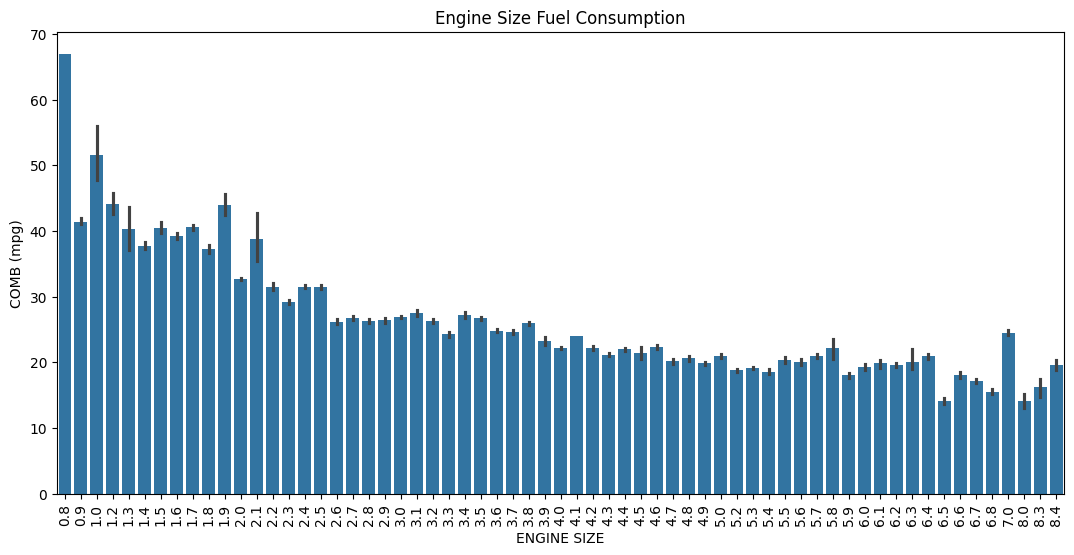

In [72]:
#Impact of Engine Size on Fuel Consumption Efficiency
plt.figure(figsize=(13,6))
sns.barplot(x="ENGINE SIZE", y = "COMB (mpg)", data = df)
plt.xticks(rotation=90)
plt.title("Engine Size Fuel Consumption", loc='center')

Observation
- The bar plot reveals that fuel consumption decreases as engine size decreases. Smaller engine sizes tend to have better fuel efficiency (measured in combined miles per gallon, MPG). This emphasizes the importance of engine size in determining a vehicle's overall fuel efficiency.

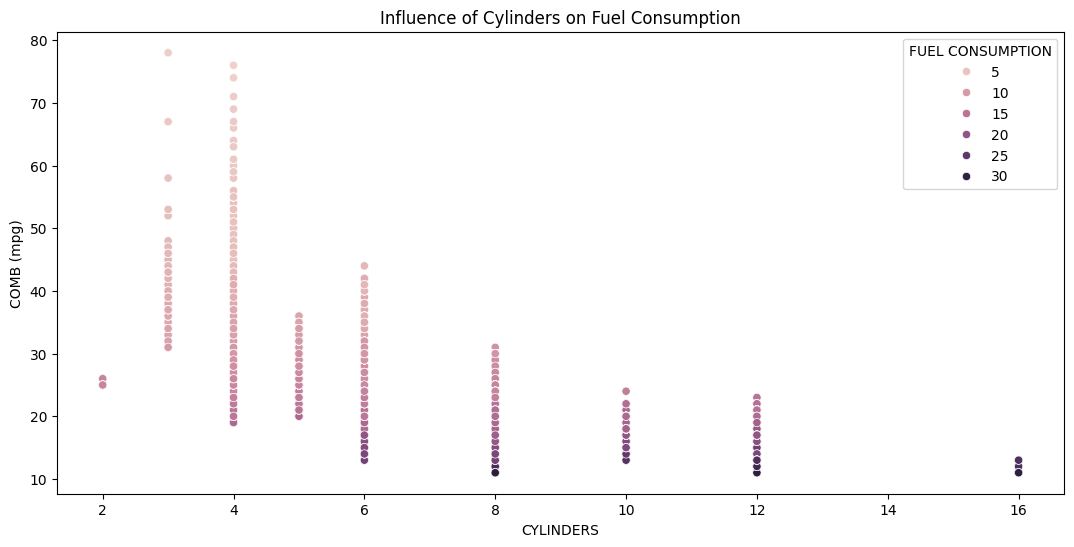

In [73]:
#Influence of Cylinders on Fuel Consumption
plt.figure(figsize=(13,6))
plt.title("Influence of Cylinders on Fuel Consumption")
sns.scatterplot(x='CYLINDERS', y='COMB (mpg)',hue='FUEL CONSUMPTION',data=df)
plt.show()

Observation
- The scatter plot shows that as the number of cylinders in a vehicle increases, its combined miles per gallon (MPG) generally decreases. This indicates that vehicles with more cylinders tend to have lower fuel efficiency, highlighting the impact of engine design on fuel consumption.

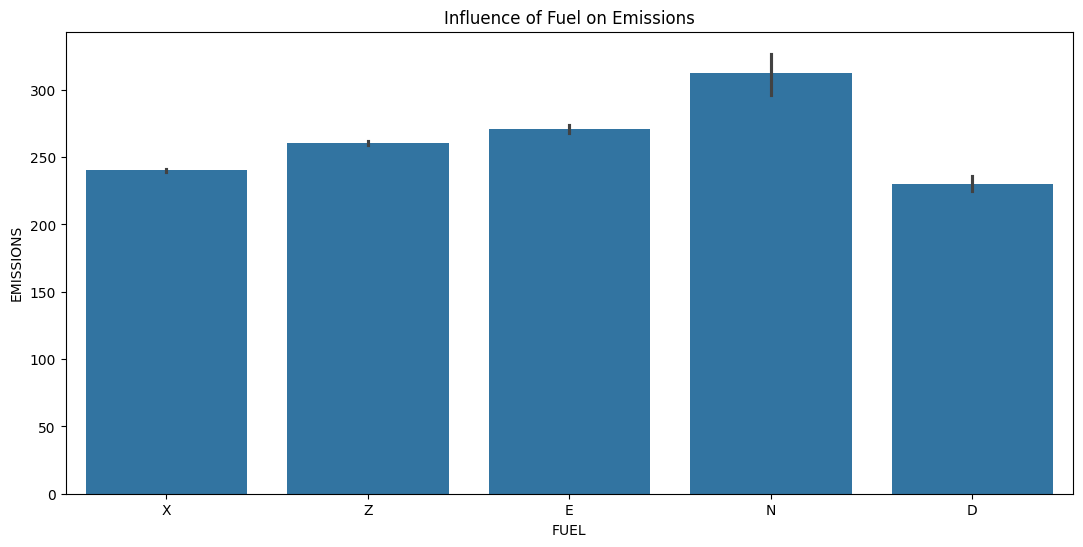

In [74]:
#Distribution of Fuel Types in the Vehicle Dataset
plt.figure(figsize=(13, 6))
plt.title("Influence of Fuel on Emissions")
sns.barplot(x='FUEL', y='EMISSIONS', data=df)
plt.show()

In [75]:
df.FUEL.value_counts()

FUEL
X    11822
Z     9316
E     1071
D      314
N       33
Name: count, dtype: int64

Observation
- Fuel Type Distribution: The dataset predominantly consists of Regular gasoline (X) and Premium gasoline (Z) vehicles, with 11,822 and 9,316 entries, respectively.

- Less Common Fuel Types: Ethanol (E85) (E) and Diesel (D) vehicles are less common, with 1,071 and 314 entries, respectively.

- Scarcity of Natural Gas Vehicles: There are only 33 entries for Natural Gas (N) vehicles, highlighting their limited presence in the dataset.

- This distribution indicates a strong preference for gasoline vehicles, while alternative fuel types like Ethanol and Natural Gas remain less common.

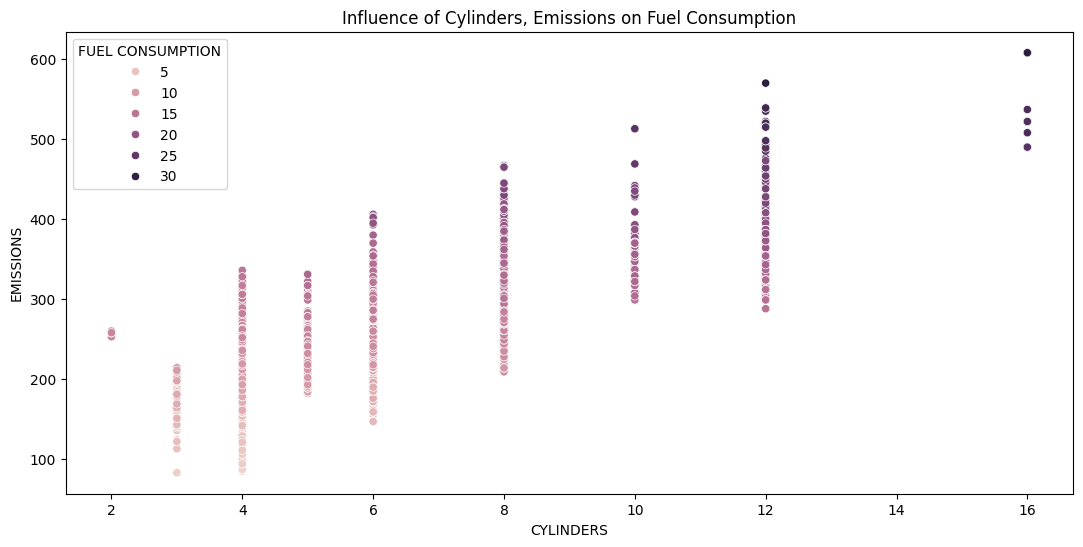

In [76]:
#Impact of Cylinders on Emissions and Fuel Consumption
plt.figure(figsize=(13,6))
plt.title("Influence of Cylinders, Emissions on Fuel Consumption")
sns.scatterplot(x='CYLINDERS', y='EMISSIONS', hue='FUEL CONSUMPTION',data=df)
plt.show()

Observation
- The scatter plot illustrates that as the number of cylinders in a vehicle increases, emissions also tend to increase. This relationship is visualized with the size and color of the points, representing different levels of fuel consumption. Vehicles with more cylinders and higher fuel consumption typically have higher emissions, emphasizing the environmental impact of larger, less fuel-efficient engines.

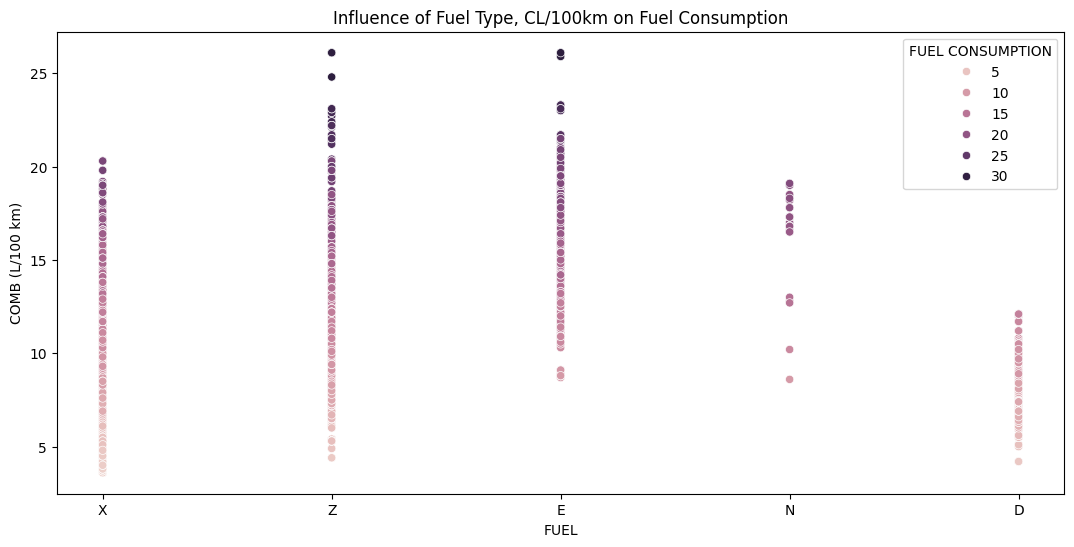

In [77]:
#"Fuel Type Influence on Fuel Consumption
plt.figure(figsize=(13,6))
plt.title("Influence of Fuel Type, CL/100km on Fuel Consumption")
sns.scatterplot(x='FUEL', y='COMB (L/100 km)', hue='FUEL CONSUMPTION',data=df)
plt.show()

Observation
- The scatter plot visualizes the influence of different fuel types on fuel consumption (in L/100 km). It highlights that Regular gasoline (X) and Premium gasoline (Z) are the most common fuel types, with a significant number of data points indicating a wide range of fuel consumption levels. Ethanol (E) and Natural Gas (N) vehicles show lower fuel consumption, although they are less common. Diesel (D) vehicles also display varied fuel efficiency.

In [78]:
#Processing and Encoding Transmission Types
df['TRANSMISSION_TYPE'] = df['TRANSMISSION'].str.extract(r'([A-Z]+)')

#Mapping Transmission Types to Descriptive Labels
transmission_mapping = {
    'A': 'Automatic',
    'AM': 'Automated Manual',
    'AS': 'Automatic with Select Shift',
    'AV': 'Continuously Variable',
    'M': 'Manual'
}

df['TRANSMISSION_TYPE'] = df['TRANSMISSION_TYPE'].map(transmission_mapping)

#Checking for any unmapped transmission types
unmapped = df['TRANSMISSION_TYPE'].isnull().sum()
if unmapped > 0:
    print(f"Warning: There are {unmapped} unmapped transmission types. They will be filled with 'Unknown'.")
    df['TRANSMISSION_TYPE'].fillna('Unknown', inplace=True)

#Label Encoder for transmission 
label_encoder = LabelEncoder()
df['TRANSMISSION_TYPE_ENCODED'] = label_encoder.fit_transform(df['TRANSMISSION_TYPE'])

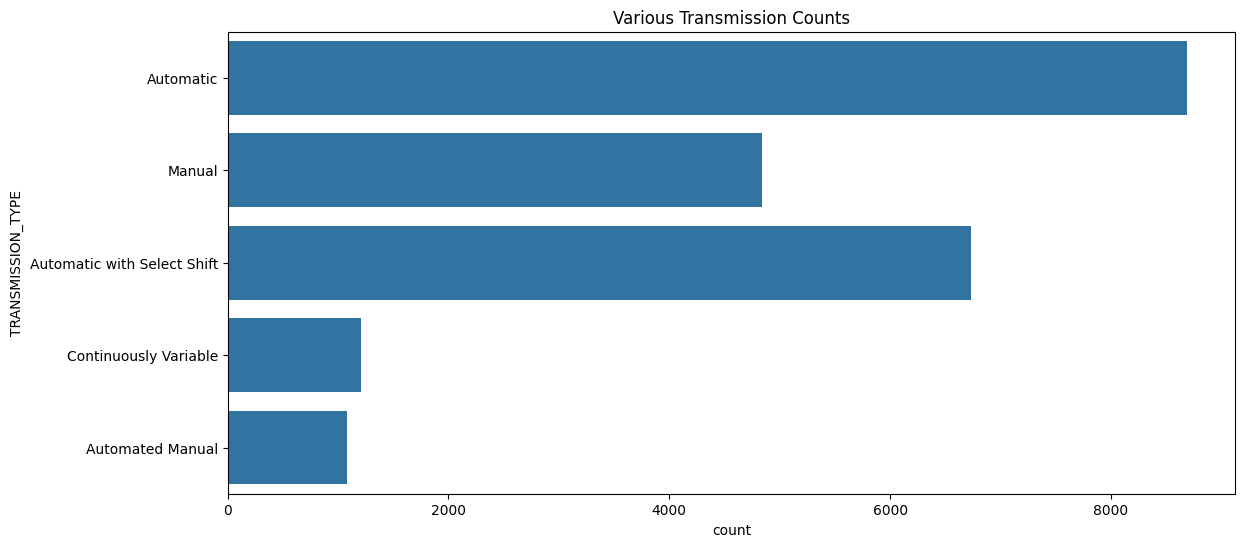

In [79]:
#Transmission Type Distribution
plt.figure(figsize=(13,6))
plt.title("Various Transmission Counts")
sns.countplot( y='TRANSMISSION_TYPE',data=df)
plt.show()

In [80]:
df.TRANSMISSION_TYPE.value_counts()

TRANSMISSION_TYPE
Automatic                      8691
Automatic with Select Shift    6736
Manual                         4844
Continuously Variable          1207
Automated Manual               1078
Name: count, dtype: int64

Observation
- Predominance of Automatic Transmissions: The bar plot and table reveal that "Automatic" transmissions are the most common, with 8,691 vehicles. This suggests a strong preference for automatic transmissions among consumers.

- Automatic with Select Shift: The second most common transmission type is "Automatic with Select Shift," with 6,736 vehicles. This type of transmission offers the convenience of an automatic with the option for manual control, indicating a consumer desire for flexibility.

- Manual Transmissions: Despite the prevalence of automatic transmissions, "Manual" transmissions still account for a significant number, with 4,344 vehicles. This indicates that there is still a market for manual transmission vehicles, possibly among driving enthusiasts.

- Advanced Transmissions: "Continuously Variable" and "Automated Manual" transmissions have lower counts, with 1,207 and 1,978 vehicles, respectively. These types represent more advanced transmission technologies that may offer improved fuel efficiency and performance.

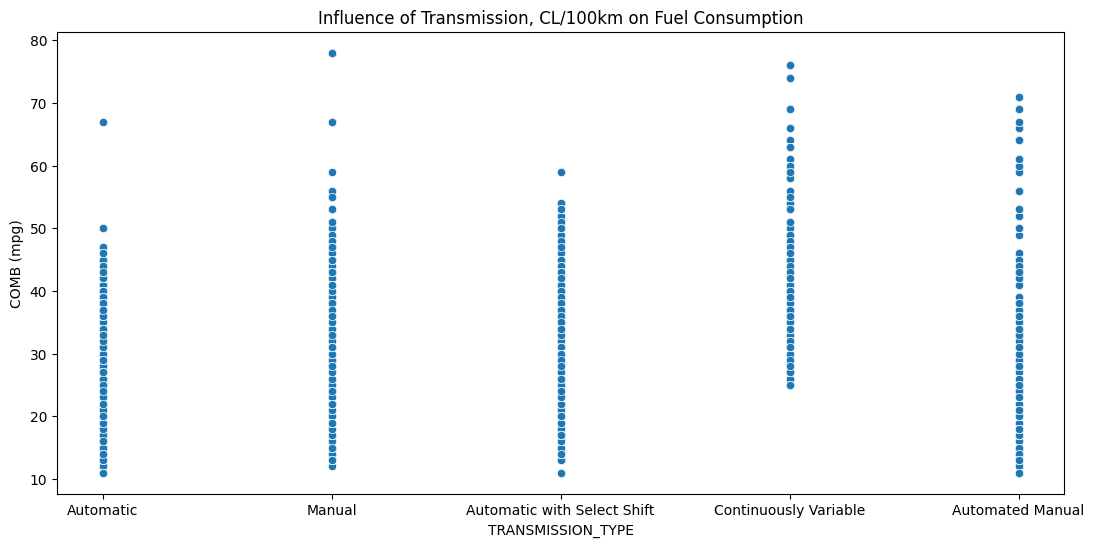

In [81]:
#Fuel Consumption Across Different Transmission Types
plt.figure(figsize=(13,6))
plt.title("Influence of Transmission, CL/100km on Fuel Consumption")
sns.scatterplot(x='TRANSMISSION_TYPE', y='COMB (mpg)',data=df)
plt.show()

Key Insights:
- Fuel Consumption Distribution: The scatter plot illustrates fuel consumption (COMB in mpg) across various transmission types. Data points are color-coded by fuel consumption levels, ranging from 5 to 30 mpg.

- Transmission Types: The transmission types included are Automatic, Manual, Automatic with Select Shift, Continuously Variable, and Automated Manual.

Fuel Efficiency:

- Automatic: Shows a wide range of fuel consumption, with many vehicles achieving between 10 and 30 mpg.

- Manual: Similar to automatic, but with a slightly higher concentration of vehicles achieving lower mpg.

- Automatic with Select Shift: Displays a more uniform distribution, with most vehicles achieving between 10 and 25 mpg.

- Continuously Variable: Shows a concentration of vehicles achieving higher mpg, indicating better fuel efficiency.

- Automated Manual: Similar to continuously variable, with a concentration of vehicles achieving higher mpg.

- Comparison: Continuously Variable and Automated Manual transmissions appear to be more fuel-efficient compared to other types, as indicated by the higher concentration of vehicles achieving higher mpg.

In [82]:
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                               YEAR  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  \
YEAR                       1.000000    -0.077782  -0.072607         -0.098631   
ENGINE SIZE               -0.077782     1.000000   0.913377          0.821605   
CYLINDERS                 -0.072607     0.913377   1.000000          0.794943   
FUEL CONSUMPTION          -0.098631     0.821605   0.794943          1.000000   
HWY (L/100 km)            -0.007471     0.749394   0.698344          0.942351   
COMB (L/100 km)           -0.068020     0.807316   0.771587          0.992960   
COMB (mpg)                 0.079989    -0.755002  -0.714215         -0.921361   
EMISSIONS                 -0.047869     0.821285   0.802176          0.919101   
TRANSMISSION_TYPE_ENCODED -0.060402    -0.290851  -0.284038         -0.295856   

                           HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
YEAR                            -0.007471        -0.068020    0.079989   
ENGINE SIZE                      0.749394

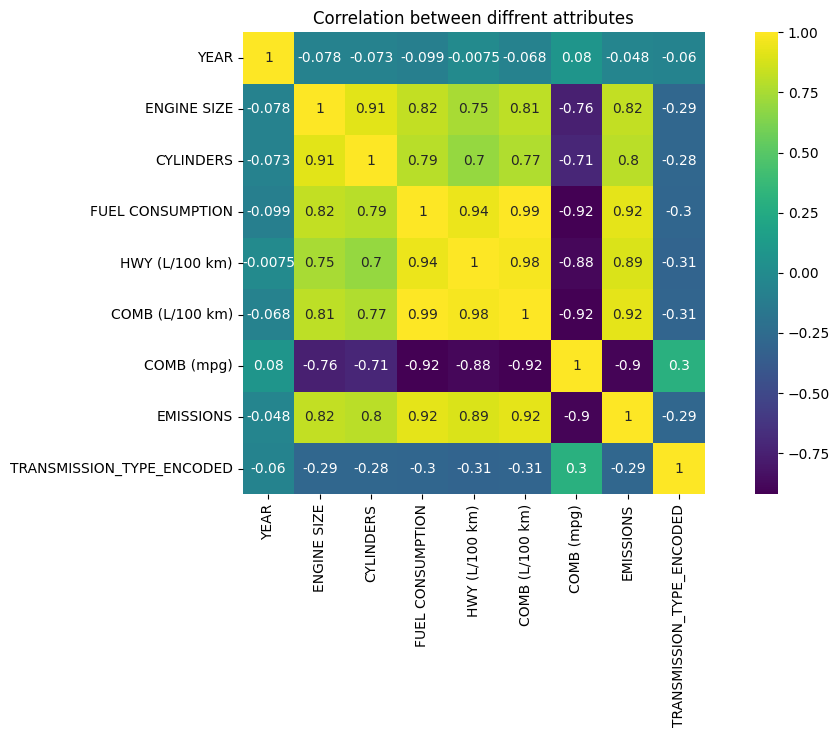

In [83]:
plt.figure(figsize=(13,6))
sns.heatmap(numerical_df.corr(),vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between diffrent attributes')
plt.show()

High Correlations:

- Engine Size and Cylinders: There's a strong positive correlation. Vehicles with larger engines tend to have more cylinders.

- Fuel Consumption and Combined Consumption (L/100 km): These are very closely linked, showing that higher fuel consumption directly impacts the overall efficiency of the vehicle.

- Emissions and Fuel Consumption: Higher fuel consumption usually results in higher emissions, which is critical for understanding environmental impact.

Negative Correlations:

- Combined Consumption (mpg) vs. Other Factors: There is a strong negative correlation between combined fuel consumption in miles per gallon and factors such as fuel consumption, highway consumption, and combined consumption in liters per 100 km. Essentially, as fuel consumption increases, efficiency decreases.

- Transmission Type and Engine Size/Cylinders: Certain transmission types are moderately negatively correlated with engine size and number of cylinders, suggesting manual transmissions might be more common in smaller, less powerful engines.

**Data Preprocessing**

In [84]:
# Mapping the FUEL column to descriptive labels
fuel_mapping = {
    'X': 'Regular Gasoline',
    'Z': 'Premium Gasoline',
    'D': 'Diesel',
    'E': 'Ethanol',
    'N': 'Natural Gas'
}

#Replacing the FUEL codes with their descriptive labels
df['FUEL'] = df['FUEL'].map(fuel_mapping)

#Checking for any unmapped values
unmapped_fuel = df['FUEL'].isnull().sum()
if unmapped_fuel > 0:
    print(f"Warning: {unmapped_fuel} FUEL values could not be mapped. They will be labeled as 'Unknown'.")
    df['FUEL'].fillna('Unknown', inplace=True)

#One-Hot Encoding the FUEL column
one_hot_encoded_fuel = pd.get_dummies(df['FUEL'], prefix='FUEL').astype(int)

#Combining the one-hot encoded columns with the original dataframe
df = pd.concat([df, one_hot_encoded_fuel], axis=1)

#Droping the original FUEL column
df.drop(columns=['FUEL'], inplace=True)

# Display the updated dataframe
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,TRANSMISSION_TYPE,TRANSMISSION_TYPE_ENCODED,FUEL_Diesel,FUEL_Ethanol,FUEL_Natural Gas,FUEL_Premium Gasoline,FUEL_Regular Gasoline
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,9.2,6.7,8.1,35,186,Automatic,1,0,0,0,0,1
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,8.5,6.5,7.6,37,175,Manual,4,0,0,0,0,1
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,12.2,7.4,10.0,28,230,Automatic with Select Shift,2,0,0,0,1,0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,13.4,9.2,11.5,25,264,Automatic,1,0,0,0,1,0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,10.0,7.0,8.6,33,198,Automatic,1,0,0,0,0,1


In [85]:
#splitting the data into dependent(y) and independent(x) variables
X = df.drop(['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION_TYPE', 'TRANSMISSION'], axis=1)
y = df['FUEL CONSUMPTION']

In [86]:
# Split normalized data into training (70%) and testing (30%) sets.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 22)

***Model Building***

RANDOM FOREST REGRESSOR

In [87]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) 
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Regressor Results:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R-squared (R²): {rf_r2}")
print()

Random Forest Regressor Results:
Mean Squared Error (MSE): 8.076680951677273e-05
R-squared (R²): 0.999993651401232



*Cross-Validation*

In [88]:
# Perform 5-fold cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Cross-validation results
print("Random Forest Regressor Cross-Validation Results:")
print(f"R² scores: {rf_cv_scores}")
print(f"Mean R²: {rf_cv_scores.mean()}")
print(f"Standard Deviation of R²: {rf_cv_scores.std()}")
print()

Random Forest Regressor Cross-Validation Results:
R² scores: [0.99998224 0.99999661 0.99999714 0.99997353 0.99997102]
Mean R²: 0.999984105853402
Standard Deviation of R²: 1.1070558004391617e-05



Explanation of the Results:

- This script performs 5-fold cross-validation to evaluate the performance of a Random Forest Regressor model using R2R2 as the scoring metric. The dataset is divided into 5 parts, and the model is trained and tested across different splits to assess its generalization capability.
Key Results:

    R² Scores: The model achieved scores close to 1 across all folds, indicating it explains almost all the variability in the target variable.
    Mean R²: The average R2R2 score (0.99998) shows the model's overall predictive strength.
    Standard Deviation: A very low standard deviation (0.000011) highlights consistent performance across folds, demonstrating stability and reliability.

GRADIENT BOOSTING REGRESSOR

In [89]:
# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
gbr_y_pred = gbr_model.predict(X_test)

gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_r2 = r2_score(y_test, gbr_y_pred)

print("Gradient Boosting Regressor Results:")
print(f"Mean Squared Error (MSE): {gbr_mse}")
print(f"R-squared (R²): {gbr_r2}")
print()

Gradient Boosting Regressor Results:
Mean Squared Error (MSE): 0.0008701612742700328
R-squared (R²): 0.9999316017950094



CROSS VALIDATION

In [90]:
# Gradient Boosting Regressor Cross-Validation
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_cv_scores = cross_val_score(gbr_model, X, y, cv=5, scoring='r2')

print("Gradient Boosting Regressor Cross-Validation Results:")
print(f"R² scores: {gbr_cv_scores}")
print(f"Mean R²: {gbr_cv_scores.mean()}")
print(f"Standard Deviation of R²: {gbr_cv_scores.std()}")
print()

Gradient Boosting Regressor Cross-Validation Results:
R² scores: [0.99992425 0.99993084 0.99994007 0.99991535 0.99992759]
Mean R²: 0.9999276179894675
Standard Deviation of R²: 8.088706625406623e-06



- R² Scores Across Folds:
These values, all very close to 1, indicate that the model explains almost all the variability in the target variable, demonstrating exceptional predictive performance.

- Mean R² Score:
The mean R2R2 score is 0.9999276179984675, which reflects the model's high accuracy across all folds.

- Standard Deviation of R² Scores:
The standard deviation is 8.088706625406623e-06, a very small value, indicating that the model performs consistently across the different splits of the data. This consistency highlights the model's robustness and reliability.

SUPPORT VECTOR REGRESSOR

In [91]:
# Support Vector Regressor
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)

print("Support Vector Machine Regressor Results:")
print(f"Mean Squared Error (MSE): {svm_mse}")
print(f"R-squared (R²): {svm_r2}")

Support Vector Machine Regressor Results:
Mean Squared Error (MSE): 1.9778486607108947
R-squared (R²): 0.8445330743439063


CROSS VALIDATION

In [92]:
# Support Vector Machine Regressor Cross-Validation
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='r2')

print("Support Vector Machine Regressor Cross-Validation Results:")
print(f"R² scores: {svm_cv_scores}")
print(f"Mean R²: {svm_cv_scores.mean()}")
print(f"Standard Deviation of R²: {svm_cv_scores.std()}")

Support Vector Machine Regressor Cross-Validation Results:
R² scores: [0.91171717 0.83641635 0.75571775 0.83528473 0.90712371]
Mean R²: 0.8492519400865881
Standard Deviation of R²: 0.057200568303397994


- R² Scores: [0.9117, 0.8364, 0.7557, 0.8353, 0.9071]
Scores indicate good predictive performance but with some variability.
- Mean R²: 0.8492
On average, the model explains 85% of the variance in the target variable.
- Standard Deviation: 0.0572
Moderate variability.

In [93]:
# Results for Random Forest Regressor
rf_results = {
    "Model": "Random Forest Regressor",
    "Mean R²": rf_cv_scores.mean(),
    "R² Std Dev": rf_cv_scores.std(),
    "Min R²": rf_cv_scores.min(),
    "Max R²": rf_cv_scores.max(),
}

# Results for Gradient Boosting Regressor
gbr_results = {
    "Model": "Gradient Boosting Regressor",
    "Mean R²": gbr_cv_scores.mean(),
    "R² Std Dev": gbr_cv_scores.std(),
    "Min R²": gbr_cv_scores.min(),
    "Max R²": gbr_cv_scores.max(),
}

# Results for Support Vector Machine Regressor
svm_results = {
    "Model": "Support Vector Machine Regressor",
    "Mean R²": svm_cv_scores.mean(),
    "R² Std Dev": svm_cv_scores.std(),
    "Min R²": svm_cv_scores.min(),
    "Max R²": svm_cv_scores.max(),
}

# Combine results into a DataFrame
comparison_table = pd.DataFrame([gbr_results, svm_results, rf_results])

print(comparison_table)

                              Model   Mean R²  R² Std Dev    Min R²    Max R²
0       Gradient Boosting Regressor  0.999928    0.000008  0.999915  0.999940
1  Support Vector Machine Regressor  0.849252    0.057201  0.755718  0.911717
2           Random Forest Regressor  0.999984    0.000011  0.999971  0.999997


Model Comparison Summary:

This table compares the performance of three regression models—Gradient Boosting Regressor, Support Vector Machine (SVM) Regressor, and Random Forest Regressor—based on 5-fold cross-validation results.

   - Gradient Boosting Regressor:
        Achieved the highest consistency with a mean R2R2 of 0.999928 and a very low standard deviation (0.000008).
        It performed extremely well across all folds, with R2R2 ranging from 0.999915 to 0.999940.

- Support Vector Machine Regressor:
        Achieved a mean R2R2 of 0.849252, indicating it explains 85% of the target variance on average.
        Performance varied more significantly across folds, with a standard deviation of 0.057201 and R2R2 ranging from 0.755718 to 0.911717.

   -  Random Forest Regressor:
        Delivered the best overall performance with a mean R2R2 of 0.999984 and a very low standard deviation (0.000011).
        Its R2R2 values ranged from 0.999971 to 0.999997, demonstrating both accuracy and consistency.

**Conclusion**

The Fuel Efficiency and Emission Insights: Predictive Analytics for Vehicle Performance project demonstrates the transformative potential of data science in understanding and optimizing vehicle performance. By analyzing a comprehensive dataset of vehicle attributes and performance metrics, the project uncovered valuable insights into fuel efficiency and emissions.
- Key takeaways include:

    Engine Design Matters: Smaller engine sizes and fewer cylinders significantly enhance fuel efficiency.
    Vehicle Class Impacts: Compact and subcompact cars outperform larger vehicle classes, such as SUVs and trucks, in terms of fuel economy.
    Transmission Technology: Continuously Variable Transmissions (CVTs) are the most fuel-efficient among the studied types.
    Fuel Type Preference: While gasoline dominates the dataset, alternative fuels like Ethanol and Natural Gas offer promising efficiency gains and reduced emissions.

- The machine learning models, particularly the Random Forest Regressor, achieved near-perfect accuracy in predicting fuel consumption, reinforcing their utility in real-world applications. These findings not only aid manufacturers in designing more efficient vehicles but also support policymakers in formulating strategies to reduce carbon emissions and promote sustainable practices.

- This project highlights the critical role of predictive analytics in fostering innovation, sustainability, and informed decision-making in the automotive sector. Future enhancements could involve integrating additional data sources, exploring electric and hybrid vehicle performance, and refining models to adapt to evolving technologies and environmental goals.

Together, these insights pave the way for a greener, more efficient transportation landscape.